In [1]:
import lightgbm
print(lightgbm.__version__)

3.1.1


In [2]:
from lightgbm import LGBMClassifier

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [6]:
cancer=load_breast_cancer()

feature=cancer.data
target=cancer.target

lgbm=LGBMClassifier()

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.33,random_state=0)

In [11]:
from sklearn.metrics import f1_score

def get_clf_evals(y_test,pred=None, pred_prob=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    recall=recall_score(y_test,pred)
    precision=precision_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_prob)
    print(confusion)
    print("정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1스코어:{3:.4f},roc_auc:{4:.4f}".format(accuracy,recall,precision,f1,roc_auc))

In [12]:
evals=[(X_test,y_test)]

lgbm=LGBMClassifier(n_estimators=400)
lgbm.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
pred=lgbm.predict(X_test)
pred_prob=lgbm.predict_proba(X_test)[:,1]



[1]	valid_0's binary_logloss: 0.579659
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.521949
[3]	valid_0's binary_logloss: 0.472768
[4]	valid_0's binary_logloss: 0.434021
[5]	valid_0's binary_logloss: 0.398166
[6]	valid_0's binary_logloss: 0.368178
[7]	valid_0's binary_logloss: 0.34453
[8]	valid_0's binary_logloss: 0.317086
[9]	valid_0's binary_logloss: 0.297918
[10]	valid_0's binary_logloss: 0.280814
[11]	valid_0's binary_logloss: 0.263724
[12]	valid_0's binary_logloss: 0.246439
[13]	valid_0's binary_logloss: 0.231129
[14]	valid_0's binary_logloss: 0.215501
[15]	valid_0's binary_logloss: 0.204986
[16]	valid_0's binary_logloss: 0.192286
[17]	valid_0's binary_logloss: 0.181933
[18]	valid_0's binary_logloss: 0.171822
[19]	valid_0's binary_logloss: 0.164705
[20]	valid_0's binary_logloss: 0.15671
[21]	valid_0's binary_logloss: 0.150896
[22]	valid_0's binary_logloss: 0.143966
[23]	valid_0's binary_logloss: 0.139566
[24]	valid_0's binary_logloss

[399]	valid_0's binary_logloss: 0.0248796
[400]	valid_0's binary_logloss: 0.0248796
Did not meet early stopping. Best iteration is:
[387]	valid_0's binary_logloss: 0.0248796


In [13]:
get_clf_evals(y_test,pred,pred_prob)

[[ 67   0]
 [  1 120]]
정확도:0.9947,정밀도:0.9917,재현율:1.0000,f1스코어:0.9959,roc_auc:0.9994


In [14]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

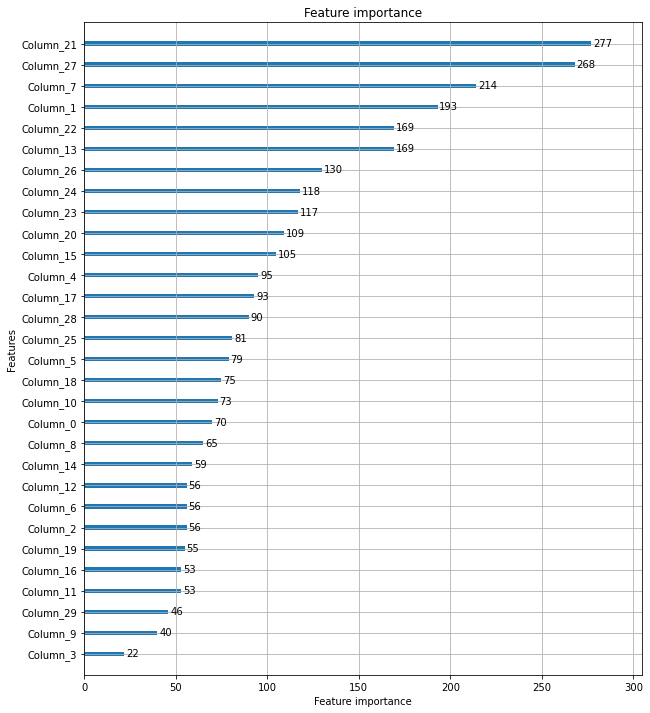

In [16]:
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)

In [17]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
df=pd.DataFrame(data=feature,columns=cancer.feature_names)

In [19]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df['target']=target

In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
